In [1]:
%load_ext autoreload

In [2]:
%autoreload 
import pathlib
import matplotlib.pyplot as plt
from ssd.config.defaults import cfg
from demo import run_demo

In [4]:
config_file = "configs/resnet50_waymo.yaml"
ckpt = None # The path to the checkpoint for test, default is the latest checkpoint
score_threshold = 0.7
images_dir = "demo/waymo" # chage to "demo/mnist" for MNIST
dataset_type = "waymo" # change to "mnist" for MNIST.

cfg.merge_from_file(config_file)
cfg.freeze()

print("Loaded configuration file {}".format(config_file))
with open(config_file, "r") as cf:
    config_str = "\n" + cf.read()
print("Running with config:\n{}".format(cfg))

drawn_images = run_demo(
    cfg=cfg,ckpt=ckpt,
    score_threshold=score_threshold,
    images_dir=pathlib.Path(images_dir),
    output_dir=pathlib.Path(images_dir, "result"),
    dataset_type=dataset_type)


Loaded configuration file configs/resnet50_waymo.yaml
Running with config:
DATASETS:
  TEST: ('waymo_val',)
  TRAIN: ('waymo_train',)
DATASET_DIR: datasets
DATA_LOADER:
  NUM_WORKERS: 4
  PIN_MEMORY: True
EVAL_STEP: 2500
INPUT:
  IMAGE_HEIGHT: 240
  IMAGE_WIDTH: 320
  PIXEL_MEAN: [123, 117, 104]
LOG_STEP: 10
MODEL:
  BACKBONE:
    INPUT_CHANNELS: 3
    NAME: resnet50
    OUT_CHANNELS: (512, 1024, 512, 256, 256, 256)
    PRETRAINED: False
  BOX_HEAD:
    NAME: SSDBoxHead
    PREDICTOR: SSDBoxPredictor
  CENTER_VARIANCE: 0.1
  META_ARCHITECTURE: SSDDetector
  NEG_POS_RATIO: 3
  NUM_CLASSES: 5
  PRIORS:
    ASPECT_RATIOS: [[2], [2, 3], [2, 3], [2, 3], [2], [2]]
    BOXES_PER_LOCATION: [4, 6, 6, 6, 4, 4]
    CLIP: True
    FEATURE_MAPS: [[30, 40], [15, 20], [8, 10], [4, 5], [2, 3], [1, 2]]
    MAX_SIZES: [60, 111, 162, 213, 264, 315]
    MIN_SIZES: [30, 60, 111, 162, 213, 264]
    STRIDES: [8, 16, 32, 64, 100, 300]
  SIZE_VARIANCE: 0.2
  THRESHOLD: 0.5
MODEL_SAVE_STEP: 2500
OUTPUT_DIR: out

Number of images: 23


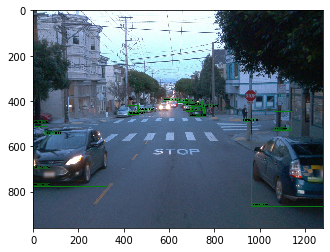

In [5]:
# Example to plot the first drawn image
print("Number of images:", len(drawn_images))
plt.imshow(drawn_images[0])

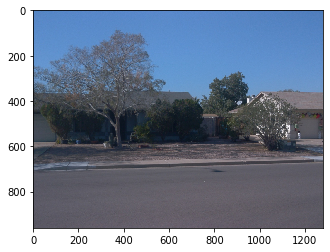

In [6]:
plt.imshow(drawn_images[1])